In [1]:
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

## Task 1
Даны значения величины заработной платы заемщиков банка (zp) и значения их
поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120,
110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя
математические операции, посчитать коэффициенты линейной регрессии, приняв
за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла
(то есть, ks - целевая переменная). Произвести расчет как с использованием
intercept, так и без.

In [2]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

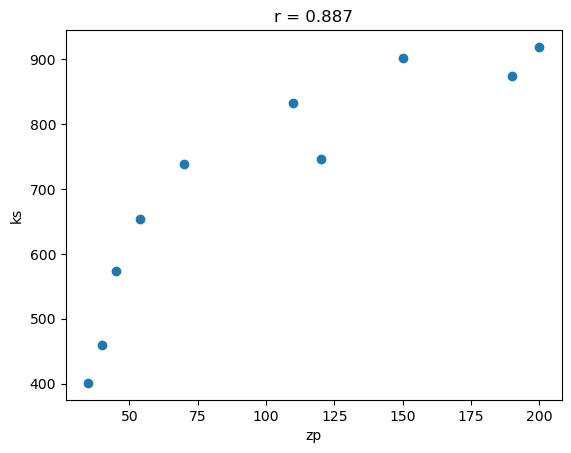

In [3]:
r = np.corrcoef(zp, ks)
plt.scatter(zp, ks)
plt.title(f'r = {round(r[0][1], 3)}')
plt.xlabel('zp')
plt.ylabel('ks')
plt.show();

In [4]:
model = LinearRegression()
zp = zp.reshape(-1, 1)
model.fit(zp, ks)
r_sq = model.score(zp, ks)

const = model.intercept_
beta = model.coef_[0]
const, beta

(444.17735732435955, 2.6205388824027653)

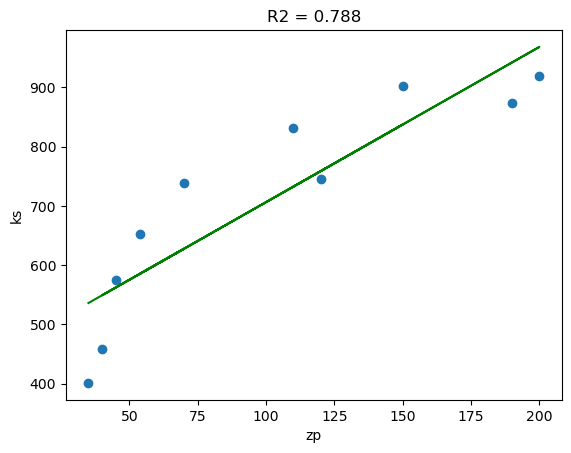

In [5]:
plt.scatter(zp, ks)
plt.plot(zp, beta * zp + const, 'g')
plt.title(f'R2 = {round(r_sq, 3)}')
plt.xlabel('zp')
plt.ylabel('ks')
plt.show();

In [12]:
# Other approach, as from the solution

In [8]:
zp = zp.reshape(1, -1)

In [9]:
mean_zp = np.mean(zp)
mean_ks = np.mean(ks)

In [10]:
# coefficient without intercept
b1 = np.sum((zp - mean_zp) * (ks - mean_ks)) / np.sum((zp - mean_zp)**2)
print(f'Coefficient B1 without intercept: {b1}')

Coefficient B1 without intercept: 2.6205388824027653


In [11]:
# coefficients with intercept
b0 = mean_ks - b1 * mean_zp
print(f'Coefficient B1 with intercept: {b1}')
print(f'Intecept (or constant) B0: {b0}')

Coefficient B1 with intercept: 2.6205388824027653
Intecept (or constant) B0: 444.17735732435955


## Task 2
Посчитать коэффициент линейной регрессии при заработной плате (zp), используя
градиентный спуск (без intercept).

In [13]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [16]:
def mse_(B1, y = ks, x = zp, n = len(zp)):
    return np.sum((B1 * x - y)**2) / n

alpha = 1e-6
B1 = 0.1
n = len(zp)

for i in range(3000):
    B1 -= alpha * (2/n) * np.sum((B1 * zp - ks) * zp)
    if i % 500 == 0:
        print('Iteration = {i}, B1 = {B1}, mse = {mse}'.format(i = i, B1 = B1, mse = mse_(B1)))

Iteration = 0, B1 = 0.25952808, mse = 493237.7212546963
Iteration = 500, B1 = 5.889815595583751, mse = 56516.858416040064
Iteration = 1000, B1 = 5.8898204201285544, mse = 56516.85841571941
Iteration = 1500, B1 = 5.889820420132673, mse = 56516.85841571943
Iteration = 2000, B1 = 5.889820420132673, mse = 56516.85841571943
Iteration = 2500, B1 = 5.889820420132673, mse = 56516.85841571943


In [17]:
# another approach

In [21]:
slope = 0
learning_rate = 0.0001
interactions = 100

def mean_se(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def gradient(zp, ks, slope):
    return np.mean((slope * zp - ks) * zp)

for i in range(interactions):
    slope -= learning_rate * gradient(zp, ks, slope)
    mse = mean_se(ks, slope * zp)
    if i % 10 == 0:
        print(f'Iteration {i + 1}: Coefficient = {slope:.2f}, Mean Squared Error = {mse:.2f}')

print(f'Iteration {i + 1}: Coefficient = {slope:.2f}')

Iteration 1: Coefficient = 8.11, Mean Squared Error = 124679.77
Iteration 11: Coefficient = 5.89, Mean Squared Error = 56516.86
Iteration 21: Coefficient = 5.89, Mean Squared Error = 56516.86
Iteration 31: Coefficient = 5.89, Mean Squared Error = 56516.86
Iteration 41: Coefficient = 5.89, Mean Squared Error = 56516.86
Iteration 51: Coefficient = 5.89, Mean Squared Error = 56516.86
Iteration 61: Coefficient = 5.89, Mean Squared Error = 56516.86
Iteration 71: Coefficient = 5.89, Mean Squared Error = 56516.86
Iteration 81: Coefficient = 5.89, Mean Squared Error = 56516.86
Iteration 91: Coefficient = 5.89, Mean Squared Error = 56516.86
Iteration 100: Coefficient = 5.89


## Task 3
Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что
изменение коэффициентов должно производиться на каждом шаге одновременно (то
есть изменение одного коэффициента не должно влиять на изменение другого во
время одной итерации).

In [35]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
slope = 0
interc = 0
learning_rate = 0.001
interactions = 100

def mean_se(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

# def gradient(zp, ks, slope):
#     return np.mean((slope * zp - ks) * zp) * 2

for i in range(interactions):
    y_pred = slope * zp + interc
    errors = y_pred - ks
    d_slope = (2 / len(zp)) * np.dot(zp, errors)
    d_interc = (2 / len(zp)) * np.sum(errors)
    slope -= learning_rate * d_slope
    interc -= learning_rate * d_interc
    if i % 10 == 0:
        mse = mean_se(ks, y_pred)
        print(f'Interaction {i}: MSE = {mse}, B1 = {slope}, b0 = {interc}')

print(f'Final values: B0 = {interc}, B1 = {slope}')

Interaction 0: MSE = 534426.9, B1 = 162.28340000000003, b0 = 1.4198000000000002
Interaction 10: MSE = 1.4527157034262774e+34, B1 = 2.7266980245567616e+16, b0 = 200697030031848.9
Interaction 20: MSE = 4.41576781753242e+62, B1 = 4.7538978213899106e+30, b0 = 3.499078978439179e+28
Interaction 30: MSE = 1.3422451049689925e+91, B1 = 8.288246183729655e+44, b0 = 6.10051563563855e+42
Interaction 40: MSE = 4.07997430177383e+119, B1 = 1.445025269433001e+59, b0 = 1.0636024865397956e+57
Interaction 50: MSE = 1.2401751544118618e+148, B1 = 2.519348464092421e+73, b0 = 1.854351856366034e+71
Interaction 60: MSE = 3.769715934121937e+176, B1 = 4.392391481164422e+87, b0 = 3.232994328919798e+85
Interaction 70: MSE = 1.145867031234965e+205, B1 = 7.657973162023862e+101, b0 = 5.636606825692086e+99
Interaction 80: MSE = 3.4830509147556406e+233, B1 = 1.3351394838497198e+116, b0 = 9.82721690020842e+113
Interaction 90: MSE = 1.0587304935115518e+262, B1 = 2.32776663435497e+130, b0 = 1.7133391593600148e+128
Final va